In [1]:
import pandas as pd
import re
import os
import string
import matplotlib.pyplot as plt
from os import listdir
import numpy as np
from sklearn.model_selection import train_test_split
# from keras.preprocessing import sequence
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM

# from keras.optimizers import Adam
# from keras.models import load_model
# from keras.callbacks import ModelCheckpoint

from matplotlib import rc
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split as tts      
from sklearn.preprocessing import StandardScaler as SS
from sklearn.metrics import confusion_matrix as CM 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as AS
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import tree 
from multiprocessing import cpu_count

In [2]:
directory = './data/'
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
frames = {}
for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    df_name = os.path.splitext(csv_file)[0]  # Use file name as DataFrame name (without extension)
    df = pd.read_csv(file_path)
    frames[df_name] = df

for title, frame in frames.items():
    translation_table = str.maketrans('', '', string.digits)
    sitename = title.split("_")[0].translate(translation_table)
    frame['Site'] = sitename

In [3]:
import shutil

def delete_files_in_folder(folder_path):
    # Delete all files in the folder (but not subdirectories)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path):  # Check if it's a file (not a directory)
                os.remove(file_path)       # Delete the file
                print(f"Deleted: {file_path}")
        except Exception as e:
            print(f"Error deleting {file_path}: {e}")

# Specify the folder path
folder_path = './data2'

# Call the function to delete files in the folder
delete_files_in_folder(folder_path)

Deleted: ./data2/ryrod_015.csv
Deleted: ./data2/fortnite_009.csv
Deleted: ./data2/bing_113.csv
Deleted: ./data2/ugm_046.csv
Deleted: ./data2/discord_028.csv
Deleted: ./data2/bing_056.csv
Deleted: ./data2/hulu_021.csv
Deleted: ./data2/minecraft_047.csv
Deleted: ./data2/bing_035.csv
Deleted: ./data2/fortnite_003.csv
Deleted: ./data2/bing_089.csv
Deleted: ./data2/chatgpt_002.csv
Deleted: ./data2/minecraft_023.csv
Deleted: ./data2/minecraft_031.csv
Deleted: ./data2/bing_039.csv
Deleted: ./data2/chatgpt_026.csv
Deleted: ./data2/discord_041.csv
Deleted: ./data2/minecraft_057.csv
Deleted: ./data2/discord_009.csv
Deleted: ./data2/bing_093.csv
Deleted: ./data2/discord_033.csv
Deleted: ./data2/minecraft_027.csv
Deleted: ./data2/minecraft_003.csv
Deleted: ./data2/chatgpt_010.csv
Deleted: ./data2/bing_116.csv
Deleted: ./data2/bing_003.csv
Deleted: ./data2/hulu_009.csv
Deleted: ./data2/discord_022.csv
Deleted: ./data2/ryrod_041.csv
Deleted: ./data2/fortnite_019.csv
Deleted: ./data2/bing_090.csv
Del

In [4]:
def remove_numbers(input_string):
    if type(input_string) == float:
        return input_string
    if 'Application Data' in input_string:
        return 'Application Data'
    if 'Payload' in input_string:
        return 'Payload'
    if 'Handshake' in input_string:
        return 'Handshake'
    translation_table = str.maketrans('', '', '0123456789')
    return input_string.translate(translation_table)

def info_dic_map(input_string):
    return info_dic[input_string]

def apply_target(df):
    if df['Site'].iloc[0] in ('amazon','chatgpt' ,'bing','discord' , 'googledrive' , 'wmregistration' , 'quizlet'):
        df['Target'] = 'sud'
        return df
    elif df['Site'].iloc[0] in ('discordstream' ,'fortnite' , 'minecraft', 'zoom'):
        df['Target'] = 'cud'
        return df
    elif df['Site'].iloc[0] in ('youtube' ,'hulu', 'Netflix', 'spotify', 'amazonvideo'):
        df['Target'] = 'cd'
        return df
    elif df['Site'].iloc[0] in ('cnn', 'Wikipedia', 'ryrod', 'ugm'):
        df['Target'] = 'sd'
    else:
        print(df['Site'].iloc[0])
        print("AAAA")
    return df
def extract_values(text):
    if type(text) == (float or int):
        return text
    # Use regex pattern to find values enclosed within square brackets
    pattern = r'\[([^\]]+)\]'  # Matches anything inside square brackets
    matches = re.findall(pattern, text)
    if not matches:
        return text
    return matches[0]

In [5]:
site_dic = {}
info_dic = {}
j = 0
user_li = ['100.69.171.196', '192.168.0.92', '192.168.0.129', '192.168.0.1', '100.86.171.196', '192.168.0.104',
           '192.168.0.200', '100.86.7.137', '2600:8805:3e22:4100:68dd:8e31:1a2:1f62']
site_li = ['18.160.17.214', '172.66.40.147', '104.234.169.167', '162.159.128.232', '70.186.28.136',
           '169.254.243.145', '74.125.155.72', '206.247.128.13', '144.195.6.47', '204.79.197.200',
           '104.18.37.228', '66.22.231.191', '66.22.196.159', '35.214.213.22', '23.48.104.108',
           '23.48.0.110', '13.32.208.51', '3.14.34.81', '3.144.65.185', '172.253.122.139', '209.222.115.47',
           '104.16.133.27','23.48.104.112', '20.36.181.22', '104.18.10.41', '172.66.43.109',
           '13.84.36.2', '208.80.154.224', '2607:f8b0:4004:f::a']
for title, frame in frames.items():
    frame['Time Delta'] = frame['Time'].diff().fillna(0)
    #1 = user
    #0 = site
    for i in user_li:
      frame['Source'] = frame['Source'].str.replace(i, '1')
      frame['Destination'] = frame['Destination'].str.replace(i, '1')
    for i in site_li:
      frame['Source'] = frame['Source'].str.replace(i, '0')
      frame['Destination'] = frame['Destination'].str.replace(i, '0')

    frame['Info'] = frame['Info'].apply(extract_values)

    for i in frame['Destination'].unique():
        if (i != '1' and i!='0'):
            frame['Source'] = frame['Source'].str.replace(i, '0')
            frame['Destination'] = frame['Destination'].str.replace(i, '0')
    for i in frame['Source'].unique():
        if (i != '1' and i!='0'):
            frame['Source'] = frame['Source'].str.replace(i, '0')
            frame['Destination'] = frame['Destination'].str.replace(i, '0')

    frame = apply_target(frame)

    protocol_map = {'UDP':0, 'TCP':1, 'TLSv1.2':2, 'TLSv1.3':3, 'RTCP': 4, 'QUIC': 5, 'SSDP':6, 'R-GOOSE':7, 'IGMPv2':8, 'ARP':9, 'WireGuard':10}
    frame['Protocol'] = frame['Protocol'].replace(protocol_map)

    translation_table = str.maketrans('', '', string.digits)
    sitename = title.split("_")[0].translate(translation_table)
    frame['Info'] = frame['Info'].apply(remove_numbers)
    for value in frame['Info'].unique():
        if value not in info_dic:
            j+=1
            info_dic[value] = j

    frame['Info'] = frame['Info'].apply(info_dic_map)

    if sitename not in site_dic:
        site_dic[sitename] = 0
    rows_per = 50
    total_dataframes = (len(frame)) // rows_per
    for i in range(total_dataframes):
        site_dic[sitename] += 1
        file_path = './data2/' + sitename + '_' + str("{:03d}".format(site_dic[sitename]) + '.csv')
        start_index = i * rows_per
        end_index = (i + 1) * rows_per
        smaller_df = frame.iloc[start_index:end_index]
        smaller_df.to_csv(file_path, index=False)

/tmp/ipykernel_95/3477826495.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  frame['Protocol'] = frame['Protocol'].replace(protocol_map)
/tmp/ipykernel_95/3477826495.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  frame['Protocol'] = frame['Protocol'].replace(protocol_map)
/tmp/ipykernel_95/3477826495.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior

In [6]:
target_map = {'discord':0, 'bing':1, 'amazon':2, 'minecraft':3}

In [7]:
# Path to the folder containing CSV files
folder_path = './data2/'

# List to store all dataframes from CSV files
all_dataframes = []
test_dfs = []
data = pd.DataFrame()
# Iterate over each file in the folder
i = 0
#y_train = pd.DataFrame(columns=['Series', 'Website'])
for file_name in os.listdir(folder_path):
    if (file_name.startswith('discord_') or file_name.startswith('bing_') or file_name.startswith('amazon_') 
        or file_name.startswith('minecraft_'))and(file_name.endswith('.csv')):
        file_path = os.path.join(folder_path, file_name)
        # Read the CSV file into a dataframe
        df = pd.read_csv(file_path)
        df = df.drop(columns=['Source','Destination','Time','Target','No.'])
        df['Flow'] = i
        #df = df._append({'Series': i, 'Website': target_map[df.iloc[0]['Site']]}, ignore_index=True)
        i+=1
        all_dataframes.append(df)
        # Append the dataframe to the list
        #data = pd.concat(df,ignore_index = True)
#df = df.replace(target_map)
# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(all_dataframes, ignore_index=True)
data = combined_df
# Path to the new combined CSV file
output_csv_path = './data3/data.csv'

# Write the combined dataframe to a new CSV file
#combined_df.to_csv(output_csv_path, index=False)
#y_train.to_csv('./data3/y_train.csv', index=False)
data.to_csv(output_csv_path, index = False)
print(f"Combined CSV file saved to: {output_csv_path}")
data = data.replace(target_map)
data



Combined CSV file saved to: ./data3/data.csv


/tmp/ipykernel_95/2593131737.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(target_map)


,Protocol,Length,Info,Site,Time Delta,Flow
0,2,385,6,1,0.000023,0
1,1,1494,7,1,0.002816,0
2,1,1494,7,1,0.000002,0
3,2,384,6,1,0.000017,0
4,1,56,7,1,0.001426,0
...,...,...,...,...,...,...
13795,1,327,14,3,0.000230,275
13796,1,329,14,3,0.000000,275
13797,1,298,14,3,0.000000,275
13798,1,54,7,3,0.000060,275


In [8]:
#TTS 
x = data.drop(columns = ['Site', 'Flow'])
y = data['Site']
X = x.iloc[:,0:5]


X_train, X_test, y_train, y_test = tts(X,y,random_state=17, test_size = 0.33)
#Random Forest
rfc = RFC(random_state = 146, n_estimators = 100, max_depth = 18)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("RFC SCORE",rfc.score(X_train, y_train))
cm = CM(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target_map.keys())
disp.plot()
plt.show()

RFC SCORE 0.9346744538178672
[[ 770    0    0    0]
 [   0 1867  121  117]
 [   0  115  333    0]
 [   1  167    6 1057]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       770
           1       0.87      0.89      0.88      2105
           2       0.72      0.74      0.73       448
           3       0.90      0.86      0.88      1231

    accuracy                           0.88      4554
   macro avg       0.87      0.87      0.87      4554
weighted avg       0.89      0.88      0.88      4554



NameError: name 'ConfusionMatrixDisplay' is not defined

In [9]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True Category')
  plt.xlabel('Predicted Category')

DTC SCORE 0.9411637464849665
[[ 770    0    0    0]
 [   0 1868  140   97]
 [   0  113  332    3]
 [   1  187    9 1034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       770
           1       0.86      0.89      0.87      2105
           2       0.69      0.74      0.71       448
           3       0.91      0.84      0.87      1231

    accuracy                           0.88      4554
   macro avg       0.87      0.87      0.87      4554
weighted avg       0.88      0.88      0.88      4554



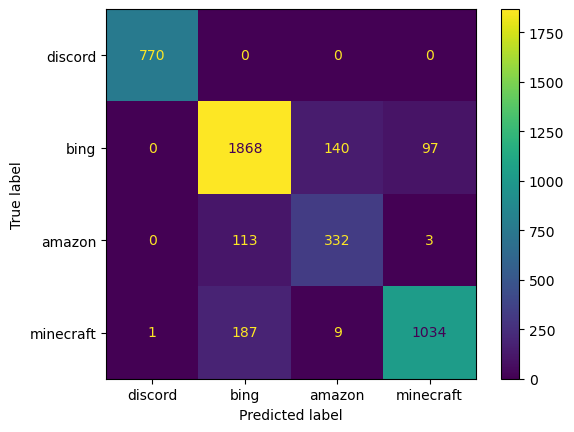

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import ConfusionMatrixDisplay
#DTC
dtc = dtc()
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("DTC SCORE", dtc.score(X_train, y_train))
cm = CM(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target_map.keys())
disp.plot()
plt.show()

In [11]:
#KNN
ss = SS()
Xtrain = ss.fit_transform(X_train)
Xtest = ss.transform(X_test)

mean_acc = []

neighbor_range = np.array(range(2,20))
for n in neighbor_range:
    knn = KNN(n_neighbors = n)
    knn.fit(Xtrain,y_train)
    y_pred = knn.predict(Xtest)
    acc = AS(y_pred,y_test)
    mean_acc.append(acc)

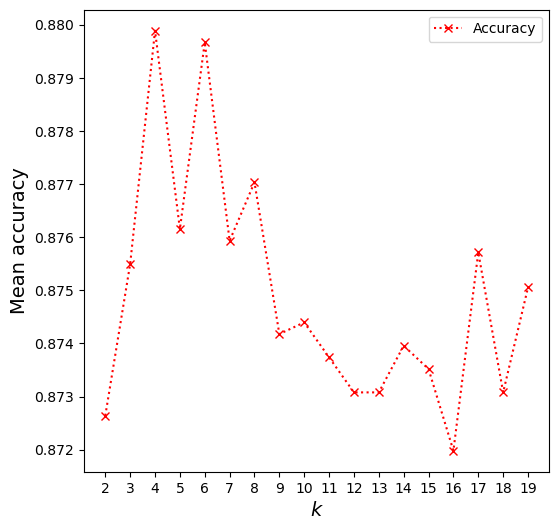

In [12]:
plt.figure(figsize=(6,6))
plt.plot(neighbor_range, mean_acc, ':xr', label='Accuracy')
plt.ylabel('Mean accuracy', fontsize=14)
plt.xlabel('$k$',fontsize=14)
plt.xticks(neighbor_range)
plt.legend()
plt.show()

kNN SCORE 0.8996322734155311
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       770
           1       0.84      0.92      0.88      2105
           2       0.75      0.67      0.71       448
           3       0.92      0.81      0.86      1231

    accuracy                           0.88      4554
   macro avg       0.88      0.85      0.86      4554
weighted avg       0.88      0.88      0.88      4554



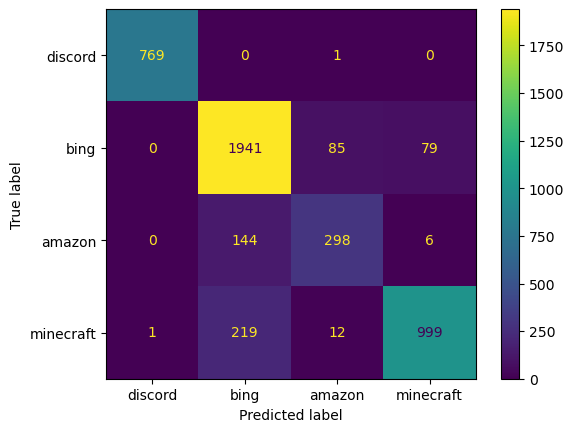

In [13]:
knn = KNN(n_neighbors = 4)
knn.fit(Xtrain,y_train)
y_pred = knn.predict(Xtest)
acc = AS(y_pred,y_test)

print("kNN SCORE", knn.score(Xtrain, y_train))
cm = CM(y_test,y_pred)
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target_map.keys())
disp.plot()
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
X = data.drop('Site', axis =1)
y = data['Site']
scaler = SS()
X_scaled = scaler.fit_transform(X)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


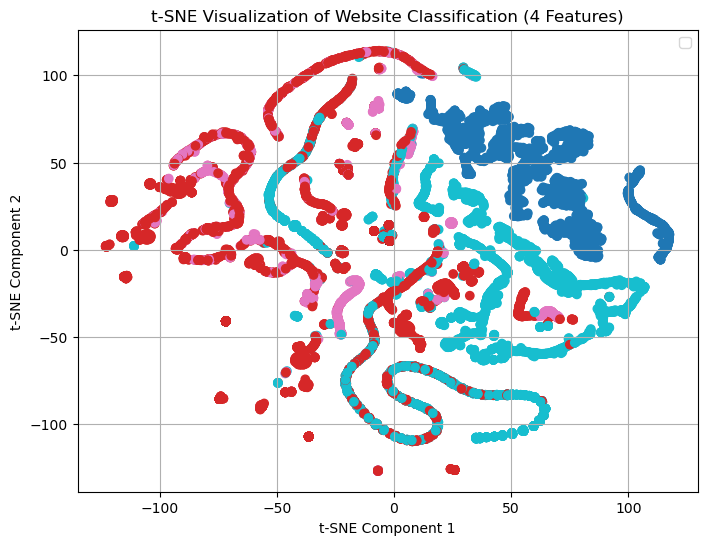

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Website Classification (4 Features)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


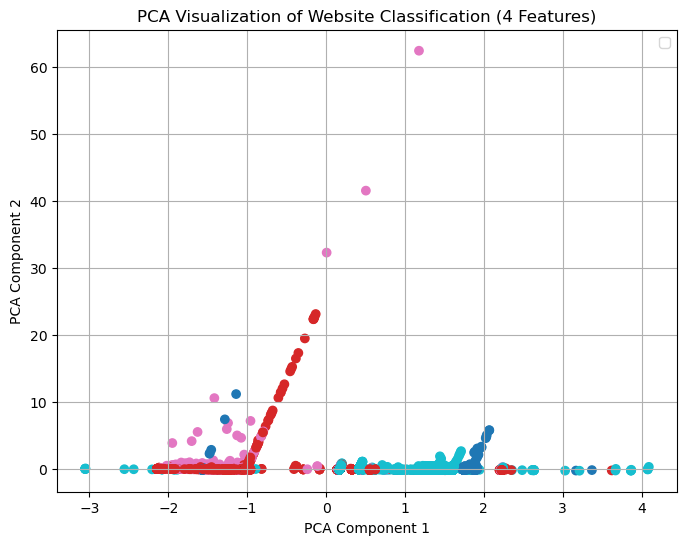

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Website Classification (4 Features)')
plt.legend()
plt.grid(True)
plt.show()